In [1]:
import os, cv2, re, random
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras import layers, models, optimizers
from keras import backend as K
from sklearn.model_selection import train_test_split

C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
img_width = 128
img_height = 128
RIGHT = 'train/right/'
WRONG = 'train/wrong/'
X = [RIGHT+i for i in os.listdir(RIGHT)] # use this for full dataset
Y = [WRONG+i for i in os.listdir(WRONG)]

In [6]:
#TEST
TEST = 'test/'
test_imgs = [TEST+i for i in os.listdir(TEST)]

In [7]:
X+=Y
len(X)

262

In [8]:
def prepare_data(list_of_images):
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """
    x = [] # images as arrays
    y = [] # labels
    
    for image in list_of_images:
        x.append(cv2.resize(cv2.imread(image), (img_width,img_height), interpolation=cv2.INTER_CUBIC))
    
    for i in list_of_images:
        if 'right' in i:
            y.append(1)
        else:
            y.append(0)
        #else:
            #print('neither cat nor dog name present in images')
            
    return x, y

In [9]:
X, Y = prepare_data(X)

In [10]:
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size=0.2, random_state=1)

In [11]:
nb_train_samples = len(X_train)
nb_validation_samples = len(X_val)
batch_size = 16

In [12]:
print(nb_train_samples)
print(nb_validation_samples)

209
53


In [13]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 61, 61, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
__________

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False)

val_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False)

In [15]:
train_generator = train_datagen.flow(np.array(X_train), Y_train, batch_size=batch_size)
validation_generator = val_datagen.flow(np.array(X_val), Y_val, batch_size=batch_size)

In [16]:
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size
)

Epoch 1/5
13/13 [==============================] - 7s 569ms/step - loss: 0.7936 - acc: 0.7196 - val_loss: 0.6321 - val_acc: 0.6875
Epoch 2/5
13/13 [==============================] - 2s 192ms/step - loss: 0.5620 - acc: 0.7583 - val_loss: 0.6084 - val_acc: 0.6875
Epoch 3/5
13/13 [==============================] - 3s 193ms/step - loss: 0.4424 - acc: 0.8163 - val_loss: 0.4862 - val_acc: 0.7500
Epoch 4/5
13/13 [==============================] - 2s 187ms/step - loss: 0.3327 - acc: 0.8453 - val_loss: 0.4127 - val_acc: 0.8125
Epoch 5/5
13/13 [==============================] - 2s 184ms/step - loss: 0.3321 - acc: 0.8985 - val_loss: 0.3951 - val_acc: 0.9167


In [17]:
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size
)

Epoch 1/10
13/13 [==============================] - 2s 191ms/step - loss: 0.2133 - acc: 0.9226 - val_loss: 0.3995 - val_acc: 0.9375
Epoch 2/10
13/13 [==============================] - 2s 184ms/step - loss: 0.1181 - acc: 0.9662 - val_loss: 0.2662 - val_acc: 0.9167
Epoch 3/10
13/13 [==============================] - 2s 185ms/step - loss: 0.1661 - acc: 0.9178 - val_loss: 0.2079 - val_acc: 0.9375
Epoch 4/10
13/13 [==============================] - 2s 187ms/step - loss: 0.0760 - acc: 0.9662 - val_loss: 0.3902 - val_acc: 0.9375
Epoch 5/10
13/13 [==============================] - 3s 195ms/step - loss: 0.1108 - acc: 0.9519 - val_loss: 0.2129 - val_acc: 0.9375
Epoch 6/10
13/13 [==============================] - 2s 184ms/step - loss: 0.1508 - acc: 0.9758 - val_loss: 0.2196 - val_acc: 0.9375
Epoch 7/10
13/13 [==============================] - 2s 184ms/step - loss: 0.0440 - acc: 0.9758 - val_loss: 0.1713 - val_acc: 0.9375
Epoch 8/10
13/13 [==============================] - 2s 184ms/step - loss: 0.

In [18]:
model.save_weights('model_weights4.h5')
model.save('model_keras4.h5')

In [149]:
X_test, Y_test = prepare_data(test_imgs)

In [150]:
len(X_test)

38

In [116]:
Y_test = []
Y_test

[]

In [117]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [118]:
test_generator = val_datagen.flow(np.array(X_test), batch_size=batch_size)
prediction_probabilities = model.predict_generator(test_generator, verbose=1)

5/5 [==============================] - 0s 54ms/step


In [119]:
prediction_probabilities

array([[5.92057370e-02],
       [7.88635314e-01],
       [4.12596554e-01],
       [9.67517257e-01],
       [7.43761897e-01],
       [2.28984296e-01],
       [3.22129868e-04],
       [9.99864936e-01],
       [3.38021189e-01],
       [4.44498330e-01],
       [8.62478018e-01],
       [4.32984114e-01],
       [9.29049671e-01],
       [2.62247235e-01],
       [2.03128681e-02],
       [8.56053412e-01],
       [7.77706623e-01],
       [7.11712912e-02],
       [4.45562601e-02],
       [1.41248241e-01],
       [1.60916205e-02],
       [1.70984328e-01],
       [2.54418790e-01],
       [2.61462741e-02],
       [7.56613433e-01],
       [4.08663511e-01],
       [4.24543589e-01],
       [2.05191392e-02],
       [8.95789862e-01],
       [1.81281582e-01],
       [6.49940372e-02],
       [1.77126005e-01],
       [1.05375215e-01],
       [1.45964464e-02],
       [6.97306573e-01],
       [1.36090770e-01],
       [9.94527042e-01],
       [7.59045547e-03]], dtype=float32)

In [67]:
prediction_probabilities[0]

array([0.9860832], dtype=float32)

In [68]:
X_test

[array([[[ 78, 106, 143],
         [ 80, 108, 146],
         [ 79, 107, 146],
         ...,
         [ 32,  66,  99],
         [ 36,  64, 103],
         [ 34,  61, 102]],
 
        [[ 80, 109, 145],
         [ 81, 110, 146],
         [ 82, 110, 149],
         ...,
         [ 34,  68, 103],
         [ 37,  65, 104],
         [ 36,  64, 103]],
 
        [[ 81, 110, 146],
         [ 82, 111, 147],
         [ 84, 112, 149],
         ...,
         [ 37,  70, 106],
         [ 38,  66, 105],
         [ 39,  67, 106]],
 
        ...,
 
        [[ 72,  96, 138],
         [ 74,  99, 140],
         [ 72,  98, 142],
         ...,
         [ 47,  75, 134],
         [ 45,  73, 132],
         [ 42,  72, 131]],
 
        [[ 73,  98, 137],
         [ 75, 101, 140],
         [ 72,  99, 140],
         ...,
         [ 45,  73, 132],
         [ 44,  72, 131],
         [ 40,  68, 127]],
 
        [[ 72,  97, 136],
         [ 73,  98, 137],
         [ 73,  97, 139],
         ...,
         [ 44,  72, 131],
  

In [50]:
%matplotlib inline
from matplotlib import pyplot as plt

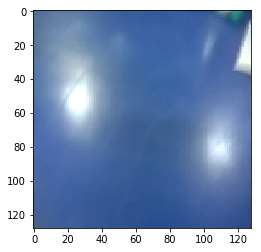

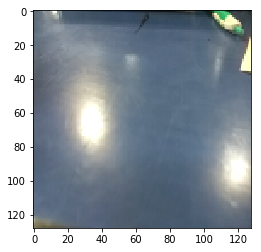

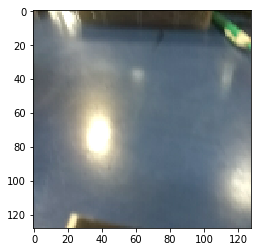

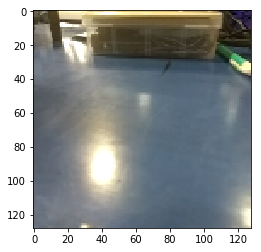

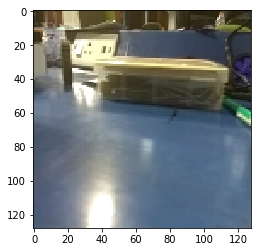

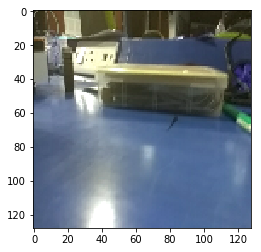

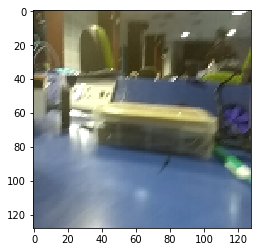

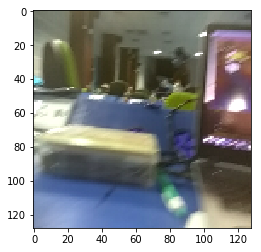

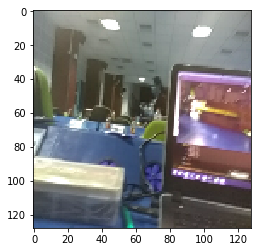

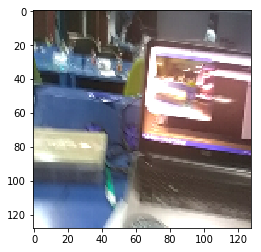

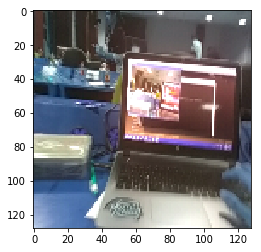

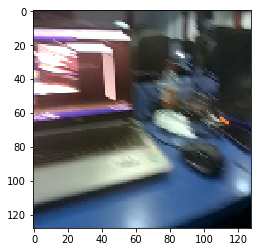

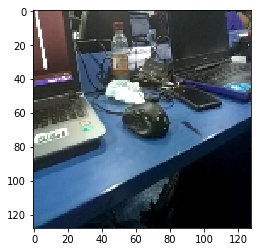

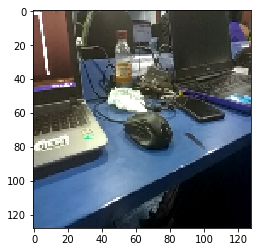

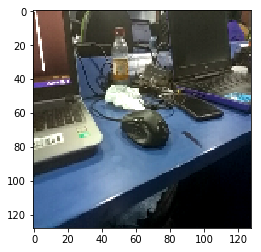

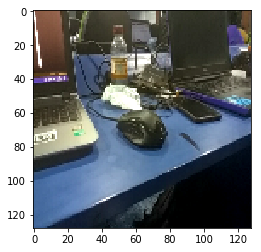

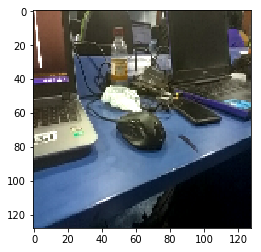

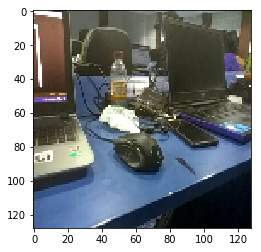

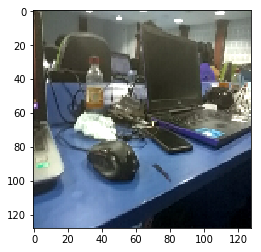

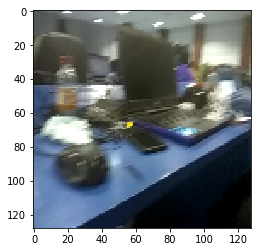

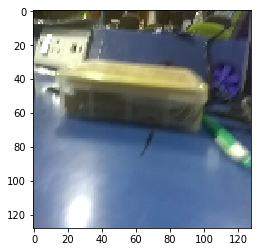

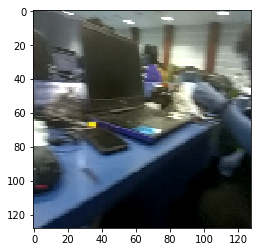

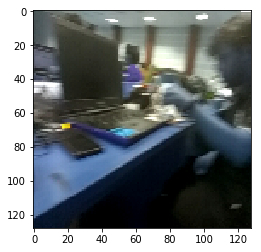

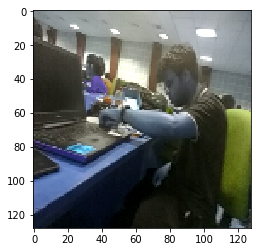

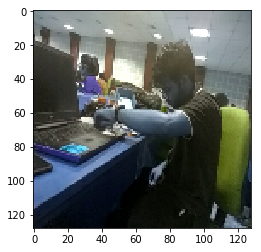

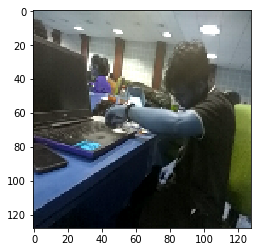

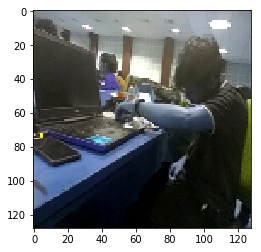

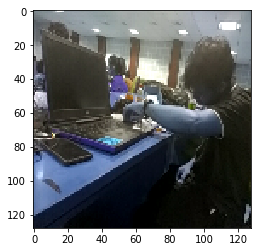

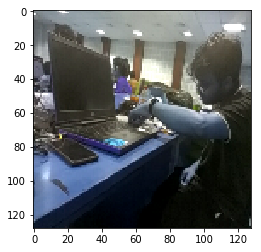

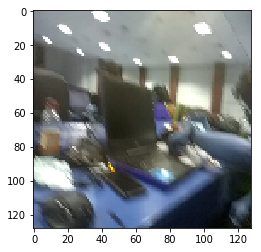

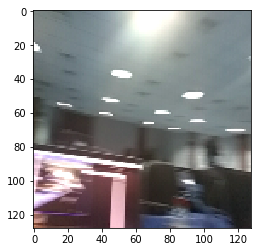

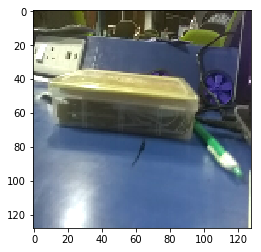

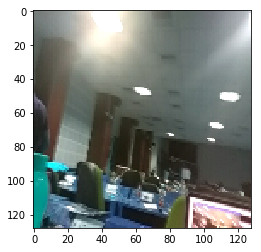

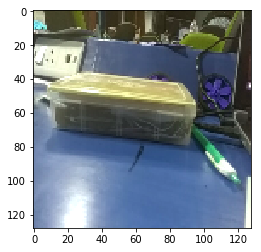

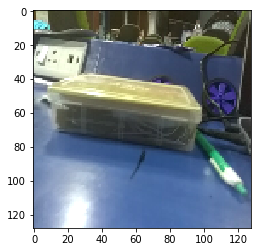

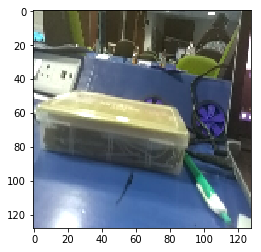

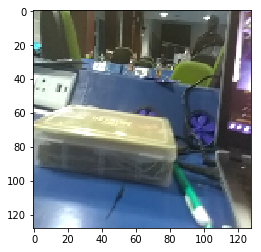

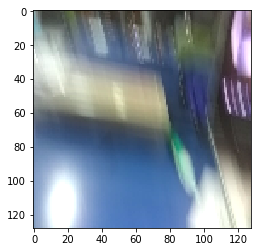

In [66]:
for i in X_test:
    plt.imshow(i)
    plt.show()

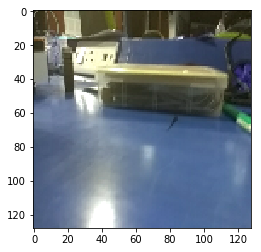

In [162]:
x = test_imgs[5]

im = cv2.imread(x)

plt.imshow(im)

In [163]:
im = im/255

In [167]:
preds = model.predict(np.expand_dims(im, axis=0))
preds[0][0]

0.12189345